<center>

# **Microproyecto  - Clustering** 
# Censo poblacional en USA entre 2010-2015


</center>


Recomendaciones de ejecución de celdas:

*   Abrir índice (ver - índice)
*   Se recomienda expandir solo el grupo de celdas que se vayan a ejecutar
*   Cada grupo de celdas es independiente de los demás grupos
*   Ejecutar solo el grupo de celdas que se quiera explorar

# PUNTO 1

## Carga del data set

In [ ]:
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate 
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
import re
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import AgglomerativeClustering


%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (25, 12)
plt.style.use('ggplot')

from google.colab import files
import io


In [ ]:

uploaded = files.upload()
censo_df = pd.read_csv(io.BytesIO(uploaded["census.csv"]))

Saving census.csv to census (5).csv


## Visualización del dataset

In [ ]:
censo_df

,SUMLEV,REGION,DIVISION,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,...,RDOMESTICMIG2011,RDOMESTICMIG2012,RDOMESTICMIG2013,RDOMESTICMIG2014,RDOMESTICMIG2015,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015
0,40,3,6,1,0,Alabama,Alabama,4779736,4780127,4785161,...,0.002295,-0.193196,0.381066,0.582002,-0.467369,1.030015,0.826644,1.383282,1.724718,0.712594
1,50,3,6,1,1,Alabama,Autauga County,54571,54571,54660,...,7.242091,-2.915927,-3.012349,2.265971,-2.530799,7.606016,-2.626146,-2.722002,2.592270,-2.187333
2,50,3,6,1,3,Alabama,Baldwin County,182265,182265,183193,...,14.832960,17.647293,21.845705,19.243287,17.197872,15.844176,18.559627,22.727626,20.317142,18.293499
3,50,3,6,1,5,Alabama,Barbour County,27457,27457,27341,...,-4.728132,-2.500690,-7.056824,-3.904217,-10.543299,-4.874741,-2.758113,-7.167664,-3.978583,-10.543299
4,50,3,6,1,7,Alabama,Bibb County,22915,22919,22861,...,-5.527043,-5.068871,-6.201001,-0.177537,0.177258,-5.088389,-4.363636,-5.403729,0.754533,1.107861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,50,4,8,56,37,Wyoming,Sweetwater County,43806,43806,43593,...,1.072643,16.243199,-5.339774,-14.252889,-14.248864,1.255221,16.243199,-5.295460,-14.075283,-14.070195
3189,50,4,8,56,39,Wyoming,Teton County,21294,21294,21297,...,-1.589565,0.972695,19.525929,14.143021,-0.564849,0.654527,2.408578,21.160658,16.308671,1.520747
3190,50,4,8,56,41,Wyoming,Uinta County,21118,21118,21102,...,-17.755986,-4.916350,-6.902954,-14.215862,-12.127022,-18.136812,-5.536861,-7.521840,-14.740608,-12.606351
3191,50,4,8,56,43,Wyoming,Washakie County,8533,8533,8545,...,-11.637475,-0.827815,-2.013502,-17.781491,1.682288,-11.990126,-1.182592,-2.250385,-18.020168,1.441961


In [ ]:
censo_df.shape

(3193, 100)

Como se puede observar el dataset cuenta con 100 columnas y con 3193 registros. 

In [ ]:
censo_df.columns

Index(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMI

In [ ]:
# Verificación si existen valores NaN en el dataset 
hayNaN = pd.isna(censo_df)

contador = 0 

for i in censo_df:
  for j in hayNaN[i]:
    if j == True:
      contador +=1

print('La cantidad de valores NAN en el dataset es: {}'.format(contador))

La cantidad de valores NAN en el dataset es: 0


Se van a separar los datos utilizados para realizar el clustering, para realizar esta separación se va a observar primero la relación que tienen las variables entre si. 

## Pre-Procesamiento

###Se busca las variables que tengan menos correlación

### *Búsqueda inicial de variables NO correlacionadas*

In [ ]:
censo_df_Data=censo_df.drop(['SUMLEV', 'REGION', 'DIVISION',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013', 'DEATHS2014',
       'DEATHS2015', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015',
       'NETMIG2011', 'NETMIG2012', 'NETMIG2013', 'NETMIG2014', 'NETMIG2015',
       'RESIDUAL2011', 'RESIDUAL2012', 'RESIDUAL2013',
       'RESIDUAL2014', 'RESIDUAL2015', 'GQESTIMATESBASE2010',
       'GQESTIMATES2011', 'GQESTIMATES2012',
       'GQESTIMATES2013', 'GQESTIMATES2014', 'GQESTIMATES2015',
       'RBIRTH2012', 'RBIRTH2013', 'RBIRTH2014', 'RBIRTH2015',
       'RDEATH2012', 'RDEATH2013', 'RDEATH2014', 'RDEATH2015',
       'RNATURALINC2012', 'RNATURALINC2013','RNATURALINC2014', 'RNATURALINC2015',
       'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013',
       'RINTERNATIONALMIG2014', 'RINTERNATIONALMIG2015',
       'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014',
       'RDOMESTICMIG2015', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015'],axis=1)

In [ ]:
# Se asigna un número a cada estado de los 51 estados registrados en el data set
# se asigna un número a cada ciudad de los 3193 ciudades registrados en el data set

label = preprocessing.LabelEncoder()
censo_df_Data['STNAME'] = label.fit_transform(censo_df_Data['STNAME'].astype(str))
censo_df_Data['CTYNAME'] = label.fit_transform(censo_df_Data['CTYNAME'].astype(str))

In [ ]:
# Visualización de los datos
censo_df_Data

,STATE,COUNTY,STNAME,CTYNAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,NPOPCHG_2010,BIRTHS2010,DEATHS2010,...,DOMESTICMIG2010,NETMIG2010,RESIDUAL2010,GQESTIMATES2010,RBIRTH2011,RDEATH2011,RNATURALINC2011,RINTERNATIONALMIG2011,RDOMESTICMIG2011,RNETMIG2011
0,1,0,0,9,4779736,4780127,4785161,5034,14226,11089,...,537,1894,3,116212,12.453020,10.183524,2.269496,1.027720,0.002295,1.030015
1,1,1,0,86,54571,54571,54660,89,151,152,...,49,82,8,455,11.572789,9.225478,2.347311,0.363924,7.242091,7.606016
2,1,3,0,93,182265,182265,183193,928,517,532,...,856,925,18,2307,11.826352,9.868812,1.957540,1.011215,14.832960,15.844176
3,1,5,0,104,27457,27457,27341,-116,70,128,...,-62,-60,2,3193,12.278483,11.692048,0.586435,-0.146609,-4.728132,-4.874741
4,1,7,0,153,22915,22919,22861,-58,44,34,...,-69,-67,-1,2224,11.668202,12.194587,-0.526385,0.438654,-5.527043,-5.088389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,56,37,50,1676,43806,43806,43593,-213,167,76,...,-324,-319,15,679,14.606203,5.728370,8.877833,0.182578,1.072643,1.255221
3189,56,39,50,1702,21294,21294,21297,3,76,10,...,-71,-66,3,271,12.108745,4.067416,8.041329,2.244092,-1.589565,0.654527
3190,56,41,50,1756,21118,21118,21102,-16,73,49,...,-45,-43,3,270,15.423430,6.616842,8.806588,-0.380825,-17.755986,-18.136812
3191,56,43,50,1819,8533,8533,8545,12,26,34,...,20,21,-1,140,12.695427,9.286470,3.408957,-0.352651,-11.637475,-11.990126


Al asignar un número a cada estado se puede observar que no coninciden los números con los asignados en la hoja de datos, lo que significa que existe un error en el conteo de los estados en la variable STATE, entonces para mayor seguridad se utiliza la variable STNAME con reasignación numérica.
El mismo argumento para la variable CTYNAME.

In [ ]:
# Se eliminan las dos primeras columnas
censo_df_Data=censo_df_Data.drop(['STATE', 'COUNTY'],axis=1)

In [ ]:
# Se hace una matriz de correlación para todas la variables independientes
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Matriz de correlacion Pearson, del censo en Estados Unidos 2010-2015')
sb.heatmap(censo_df_Data.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Error in callback <function flush_figures at 0x7f6702614950> (for post_execute):


KeyboardInterrupt: ignored

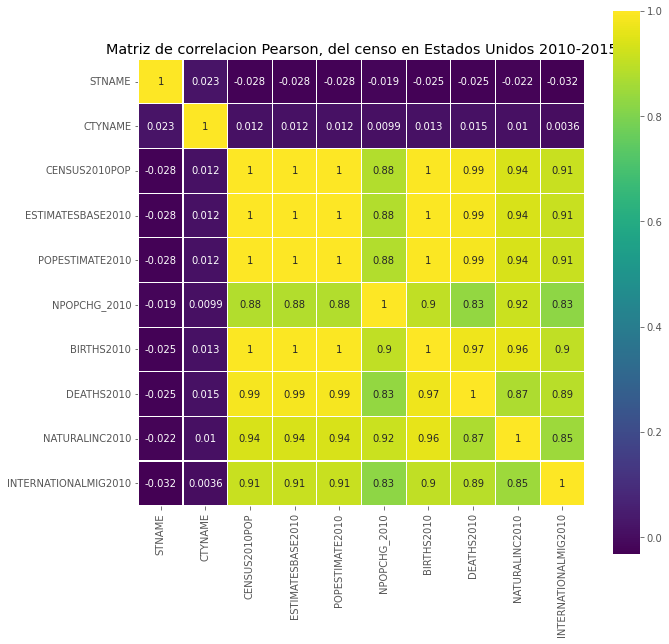

In [ ]:
# Como la matríz anterior cuenta con demasiada información se hace una matriz de correlación para la primera mitad de la variables independientes
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Matriz de correlacion Pearson, del censo en Estados Unidos 2010-2015')
sb.heatmap(censo_df_Data.iloc[:,:10].astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

### *Análisis de variables: estado, ciudad, muertes*

In [ ]:
# Se eliminan las columnas con las que no se va a trabajar
# Las columnas seleccionadas para trabajar son STNAME	CTYNAME	DEATHS201x

censo_df_Data=censo_df.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMIG2013', 'NETMIG2014', 'NETMIG2015',
       'RESIDUAL2010', 'RESIDUAL2011', 'RESIDUAL2012', 'RESIDUAL2013',
       'RESIDUAL2014', 'RESIDUAL2015', 'GQESTIMATESBASE2010',
       'GQESTIMATES2010', 'GQESTIMATES2011', 'GQESTIMATES2012',
       'GQESTIMATES2013', 'GQESTIMATES2014', 'GQESTIMATES2015', 'RBIRTH2011',
       'RBIRTH2012', 'RBIRTH2013', 'RBIRTH2014', 'RBIRTH2015', 'RDEATH2011',
       'RDEATH2012', 'RDEATH2013', 'RDEATH2014', 'RDEATH2015',
       'RNATURALINC2011', 'RNATURALINC2012', 'RNATURALINC2013',
       'RNATURALINC2014', 'RNATURALINC2015', 'RINTERNATIONALMIG2011',
       'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013',
       'RINTERNATIONALMIG2014', 'RINTERNATIONALMIG2015', 'RDOMESTICMIG2011',
       'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014',
       'RDOMESTICMIG2015', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015'],axis=1)

In [ ]:
# Se asigna un número a cada estado de los 51 estados registrados en el data set
# se asigna un número a cada ciudad de los 3193 ciudades registrados en el data set

label = preprocessing.LabelEncoder()
censo_df_Data['STNAME'] = label.fit_transform(censo_df_Data['STNAME'].astype(str))
censo_df_Data['CTYNAME'] = label.fit_transform(censo_df_Data['CTYNAME'].astype(str))

In [ ]:
# Visualización de los datos
censo_df_Data

,STNAME,CTYNAME,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015
0,0,9,11089,48811,48357,50843,50228,50330
1,0,86,152,507,558,583,504,467
2,0,93,532,1825,1879,1902,2044,1992
3,0,104,128,319,291,294,310,309
4,0,153,34,278,237,281,211,223
...,...,...,...,...,...,...,...,...
3188,50,1676,76,251,273,296,246,262
3189,50,1702,10,87,61,97,68,76
3190,50,1756,49,139,115,136,130,137
3191,50,1819,34,79,105,77,70,79


In [ ]:
# Se hace un promedio de las muertes por cada fila de todos los datos en los 6 años desde el 2010 hasta el 2015

lstprom =[]
for i in censo_df_Data.index:
  prom = 0
  for j in range (2,8):
    s = censo_df_Data.iloc[i][j]
    #out = re.sub(r'[^\w\s]','',s)
    prom += int(s)
  prom = prom/6
  lstprom.append(prom)
#arrprom = np.array(lstprom)
promDEATHS = pd.DataFrame( lstprom, columns = ['DEATHS'])

censo_df_Data=pd.concat([censo_df_Data.iloc[:,0:2], promDEATHS], axis = 1)
censo_df_Data

,STNAME,CTYNAME,DEATHS
0,0,9,43276.333333
1,0,86,461.833333
2,0,93,1695.666667
3,0,104,275.166667
4,0,153,210.666667
...,...,...,...
3188,50,1676,234.000000
3189,50,1702,66.500000
3190,50,1756,117.666667
3191,50,1819,74.000000


**visualización de los datos**

In [ ]:
fig = px.scatter_3d(censo_df_Data.dropna(), x="STNAME", y="CTYNAME", z="DEATHS")
fig.show()

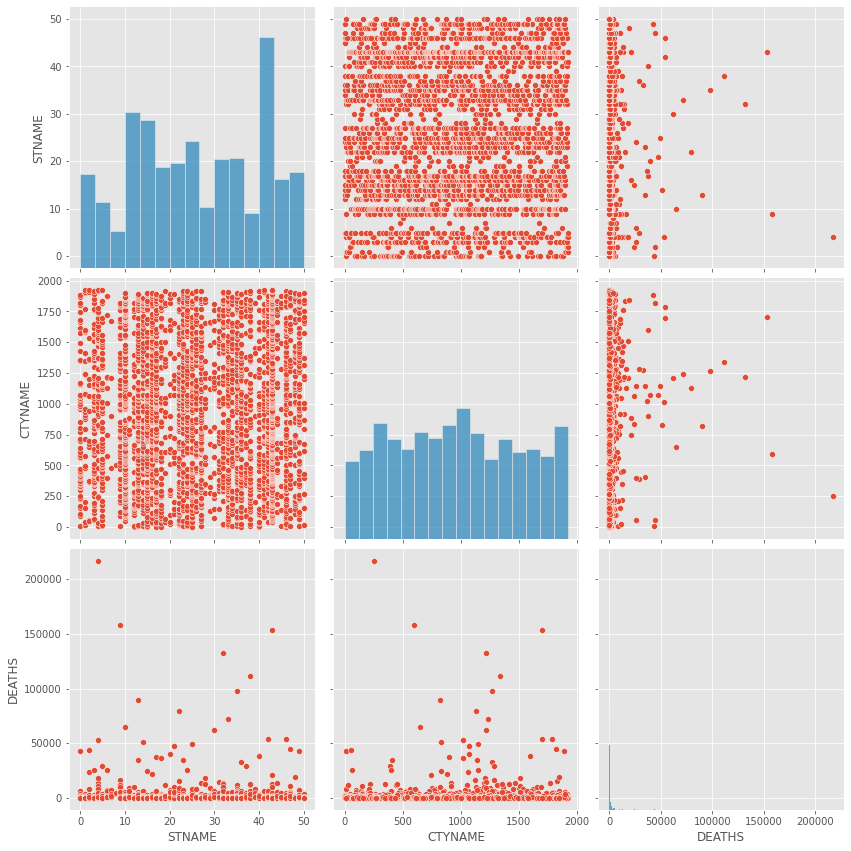

In [ ]:
sb.pairplot(censo_df_Data.dropna(),
            height=4, 
            vars=[
       'STNAME',
       'CTYNAME', 
       'DEATHS'],
            kind='scatter')
plt.show()

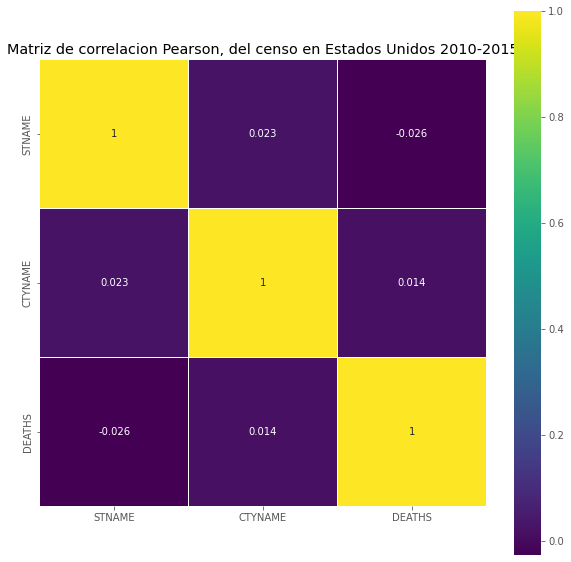

In [ ]:
# Se hace una matriz de correlación para estimar si es confiable utilizar estas variables
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Matriz de correlacion Pearson, del censo en Estados Unidos 2010-2015')
sb.heatmap(censo_df_Data.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Al ejecutar el grupo de celdas 'Métodos para establecer el número de clusters' se observa que aunque para el método de códo y el estadistico de gaps aparentemente se consideren suficientes entre 3 o 4 clusters, mediante el método de siluetas se evidencia que uno de los cluster concentra la mayoria de los datos, y los restantes los datos atípicos.

Luego entonces las variables STNAME, CTYNAME y DEATHS no arrojan resultados concluyentes, así que no se seleccionan.

### *Análisis de las variables: ciudad, nacimientos y muertes*

In [ ]:
# Se eliminan las columnas con las que no se va a trabajar
# Las columnas seleccionadas para trabajar son CTYNAME	BIRTHSx DEATHSx

censo_df_Data=censo_df.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMIG2013', 'NETMIG2014', 'NETMIG2015',
       'RESIDUAL2010', 'RESIDUAL2011', 'RESIDUAL2012', 'RESIDUAL2013',
       'RESIDUAL2014', 'RESIDUAL2015', 'GQESTIMATESBASE2010',
       'GQESTIMATES2010', 'GQESTIMATES2011', 'GQESTIMATES2012',
       'GQESTIMATES2013', 'GQESTIMATES2014', 'GQESTIMATES2015', 'RBIRTH2011',
       'RBIRTH2012', 'RBIRTH2013', 'RBIRTH2014', 'RBIRTH2015', 'RDEATH2011',
       'RDEATH2012', 'RDEATH2013', 'RDEATH2014', 'RDEATH2015',
       'RNATURALINC2011', 'RNATURALINC2012', 'RNATURALINC2013',
       'RNATURALINC2014', 'RNATURALINC2015', 'RINTERNATIONALMIG2011',
       'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013',
       'RINTERNATIONALMIG2014', 'RINTERNATIONALMIG2015', 'RDOMESTICMIG2011',
       'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014',
       'RDOMESTICMIG2015', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015'],axis=1)


In [ ]:

# se asigna un número a cada ciudad de los 3193 ciudades registrados en el data set

label = preprocessing.LabelEncoder()
censo_df_Data['CTYNAME'] = label.fit_transform(censo_df_Data['CTYNAME'].astype(str))

In [ ]:
# Visualización de los datos
censo_df_Data

,CTYNAME,BIRTHS2010,BIRTHS2011,BIRTHS2012,BIRTHS2013,BIRTHS2014,BIRTHS2015,DEATHS2010,DEATHS2011,DEATHS2012,DEATHS2013,DEATHS2014,DEATHS2015
0,9,14226,59689,59062,57938,58334,58305,11089,48811,48357,50843,50228,50330
1,86,151,636,615,574,623,600,152,507,558,583,504,467
2,93,517,2187,2092,2160,2186,2240,532,1825,1879,1902,2044,1992
3,104,70,335,300,283,260,269,128,319,291,294,310,309
4,153,44,266,245,259,247,253,34,278,237,281,211,223
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3188,1676,167,640,595,657,629,620,76,251,273,296,246,262
3189,1702,76,259,230,261,249,269,10,87,61,97,68,76
3190,1756,73,324,311,316,316,316,49,139,115,136,130,137
3191,1819,26,108,90,95,96,90,34,79,105,77,70,79


In [ ]:
# Se hace un promedio de la población por cada fila de todos los datos en los 6 años desde el 2010 hasta el 2015

lstprom1 =[]
for i in censo_df_Data.index:
  prom = 0
  for j in range (1,7):
    s = censo_df_Data.iloc[i][j]
    #out = re.sub(r'[^\w\s]','',s)
    prom += int(s)
  prom = prom/6
  lstprom1.append(prom)
#arrprom = np.array(lstprom)
promBIRTHS = pd.DataFrame( lstprom1, columns = ['BIRTHS'])

lstprom2 =[]
for i in censo_df_Data.index:
  prom = 0
  for j in range (7,13):
    s = censo_df_Data.iloc[i][j]
    #out = re.sub(r'[^\w\s]','',s)
    prom += int(s)
  prom = prom/6
  lstprom2.append(prom)
#arrprom = np.array(lstprom)
promDEATHS = pd.DataFrame( lstprom2, columns = ['DEATHS'])

censo_df_Data=pd.concat([censo_df_Data.iloc[:,0:1], promBIRTHS, promDEATHS], axis = 1)
censo_df_Data

,CTYNAME,BIRTHS,DEATHS
0,9,51259.000000,43276.333333
1,86,533.166667,461.833333
2,93,1897.000000,1695.666667
3,104,252.833333,275.166667
4,153,219.000000,210.666667
...,...,...,...
3188,1676,551.333333,234.000000
3189,1702,224.000000,66.500000
3190,1756,276.000000,117.666667
3191,1819,84.166667,74.000000


**visualización de los datos**

In [ ]:
fig = px.scatter_3d(censo_df_Data.dropna(), x="CTYNAME", y="BIRTHS", z="DEATHS")
fig.show()

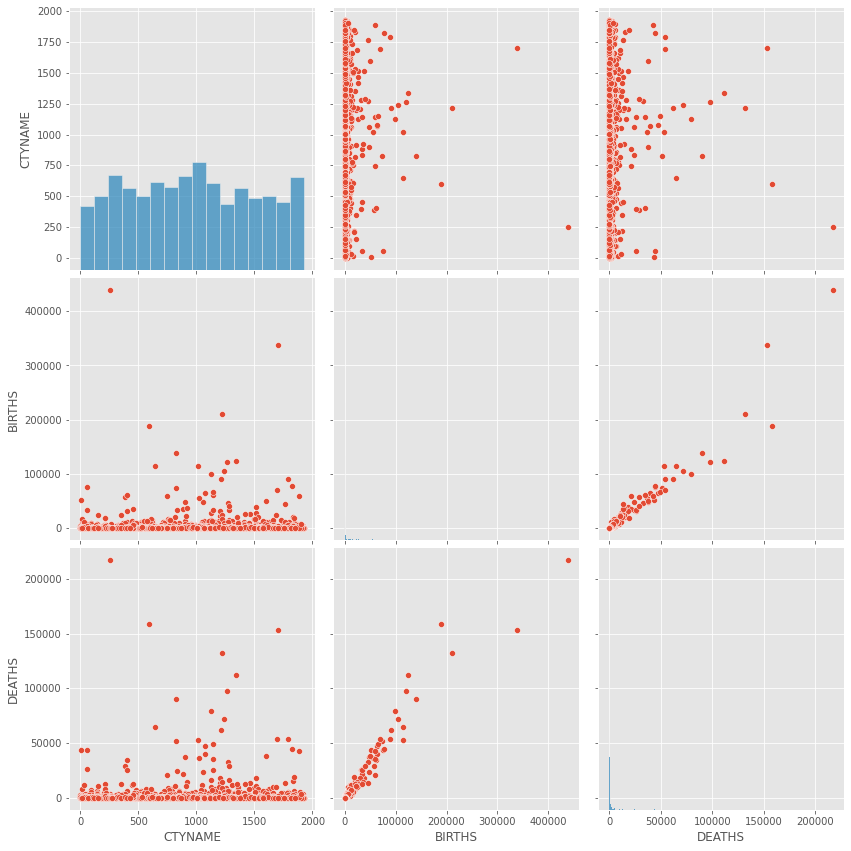

In [ ]:
sb.pairplot(censo_df_Data.dropna(),
            height=4, 
            vars=[
       'CTYNAME',
       'BIRTHS', 
       'DEATHS'],
            kind='scatter')
plt.show()

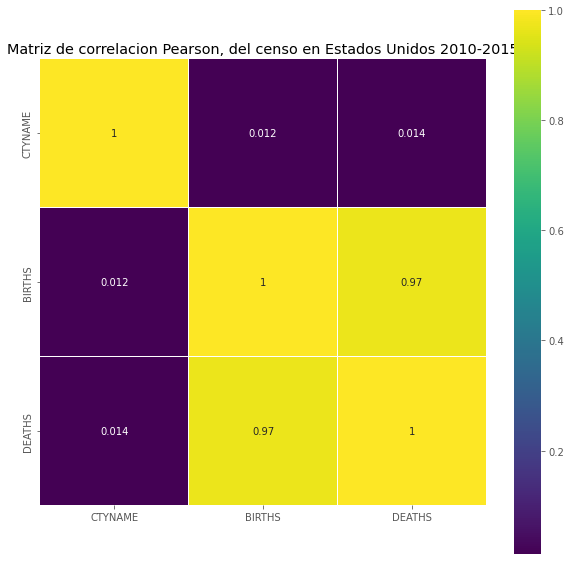

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Matriz de correlacion Pearson, del censo en Estados Unidos 2010-2015')
sb.heatmap(censo_df_Data.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Al ejecutar el grupo de celdas 'Métodos para establecer el número de clusters' se observa que aunque para el método de códo y el estadistico de gaps aparentemente se consideren suficientes entre 3 o 4 clusters, mediante el método de siluetas se evidencia que uno de los cluster concentra la mayoria de los datos, y los restantes los datos atípicos.

Luego entonces las variables CTYNAME, BIRTHS y DEATHS no arrojan resultados concluyentes, así que no se seleccionan.

### *Análisis de las variables: ciudad, tasa de nacimientos, tasa de muertes*

In [ ]:
# Se eliminan las columnas con las que no se va a trabajar
# Las columnas seleccionadas para trabajar son CTYNAME	RBIRTH201x	RDEATH201x

censo_df_Data=censo_df.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'STNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMIG2013', 'NETMIG2014', 'NETMIG2015',
       'RESIDUAL2010', 'RESIDUAL2011', 'RESIDUAL2012', 'RESIDUAL2013',
       'RESIDUAL2014', 'RESIDUAL2015', 'GQESTIMATESBASE2010',
       'GQESTIMATES2010', 'GQESTIMATES2011', 'GQESTIMATES2012',
       'GQESTIMATES2013', 'GQESTIMATES2014', 'GQESTIMATES2015',
       'RNATURALINC2011', 'RNATURALINC2012', 'RNATURALINC2013',
       'RNATURALINC2014', 'RNATURALINC2015', 'RINTERNATIONALMIG2011',
       'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013',
       'RINTERNATIONALMIG2014', 'RINTERNATIONALMIG2015', 'RDOMESTICMIG2011',
       'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014',
       'RDOMESTICMIG2015', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015'],axis=1)


In [ ]:
# Se asigna un número a cada ciudad de las 3193 ciudades registradas en el data set

label = preprocessing.LabelEncoder()
censo_df_Data['CTYNAME'] = label.fit_transform(censo_df_Data['CTYNAME'].astype(str))

In [ ]:
# Visualización de los datos
censo_df_Data

,CTYNAME,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015
0,9,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556
1,86,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022
2,93,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515
3,104,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877
4,153,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124
...,...,...,...,...,...,...,...,...,...,...,...
3188,1676,14.606203,13.349038,14.556976,13.964279,13.846858,5.728370,6.124853,6.558394,5.461387,5.851414
3189,1702,12.108745,10.653327,11.851785,11.005038,11.688030,4.067416,2.825448,4.404686,3.005392,3.302194
3190,1756,15.423430,14.844514,15.043679,15.074538,15.146794,6.616842,5.489129,6.474495,6.201550,6.566806
3191,1819,12.695427,10.643330,11.251925,11.456531,10.814708,9.286470,12.417219,9.119981,8.353720,9.492910


In [ ]:
# Se hace un promedio de la población por cada fila de todos los datos en los 6 años desde el 2010 hasta el 2015

lstprom1 =[]
for i in censo_df_Data.index:
  prom = 0
  for j in range (1,6):
    s = censo_df_Data.iloc[i][j]
    #out = re.sub(r'[^\w\s]','',s)
    prom += int(s)
  prom = prom/5
  lstprom1.append(prom)
#arrprom = np.array(lstprom)
promRBIRTHS = pd.DataFrame( lstprom1, columns = ['RBIRTHS'])

lstprom2 =[]
for i in censo_df_Data.index:
  prom = 0
  for j in range (6,11):
    s = censo_df_Data.iloc[i][j]
    #out = re.sub(r'[^\w\s]','',s)
    prom += int(s)
  prom = prom/5
  lstprom2.append(prom)
#arrprom = np.array(lstprom)
promRDEATHS = pd.DataFrame( lstprom2, columns = ['RDEATHS'])

censo_df_Data=pd.concat([censo_df_Data.iloc[:,0:1], promRBIRTHS, promRDEATHS], axis = 1)
censo_df_Data

,CTYNAME,RBIRTHS,RDEATHS
0,9,12.0,10.0
1,86,10.6,9.2
2,93,11.0,9.2
3,104,10.4,10.6
4,153,10.6,10.4
...,...,...,...
3188,1676,13.4,5.4
3189,1702,11.0,3.2
3190,1756,14.8,5.8
3191,1819,10.8,9.4


**Visualización de los datos**:

In [ ]:
fig = px.scatter_3d(censo_df_Data.dropna(), x="CTYNAME", y="RBIRTHS", z="RDEATHS")
fig.show()

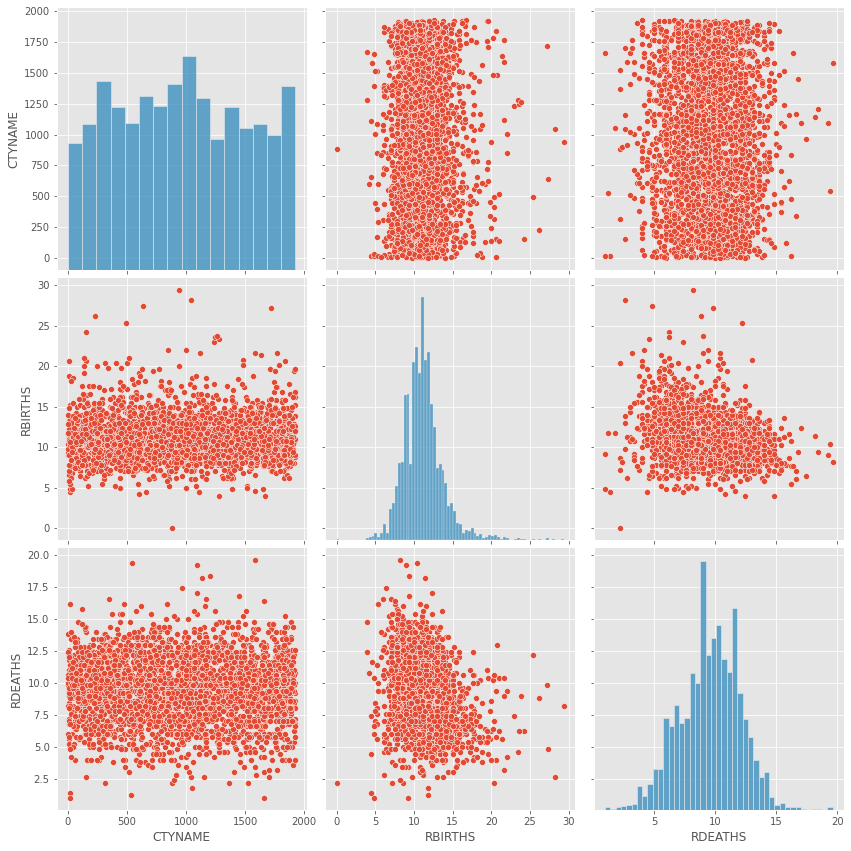

In [ ]:
sb.pairplot(censo_df_Data.dropna(),
            height=4, 
            vars=[
       'CTYNAME',
       'RBIRTHS', 
       'RDEATHS'],
            kind='scatter')
plt.show()

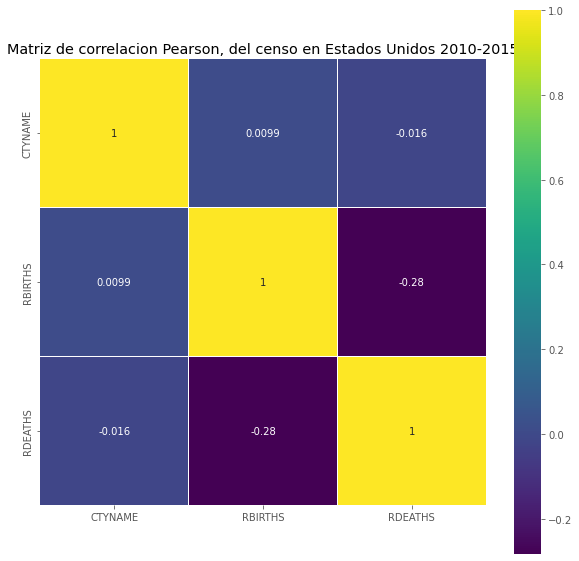

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Matriz de correlacion Pearson, del censo en Estados Unidos 2010-2015')
sb.heatmap(censo_df_Data.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Al ejecutar el grupo de celdas 'Métodos para establecer el número de clusters' se observa que aunque para el método de códo y el estadistico de gaps aparentemente se consideren suficientes entre 3 o 4 clusters, mediante el método de siluetas se evidencia que uno de los cluster concentra la mayoria de los datos, y los restantes los datos atípicos.

Luego entonces las variables CTYNAME, RBIRTHS y RDEATHS no arrojan resultados concluyentes, así que no se seleccionan.

### *Análisis de las variables: estado, tasa de nacimientos, tasa de muertes*

In [ ]:
# Se eliminan las columnas con las que no se va a trabajar
# Las columnas seleccionadas para trabajar son STNAME	RBIRTH201x	RDEATH201x

censo_df_Data=censo_df.drop(['SUMLEV', 'REGION', 'DIVISION', 'STATE', 'COUNTY', 'CTYNAME',
       'CENSUS2010POP', 'ESTIMATESBASE2010', 'POPESTIMATE2010',
       'POPESTIMATE2011', 'POPESTIMATE2012', 'POPESTIMATE2013',
       'POPESTIMATE2014', 'POPESTIMATE2015', 'NPOPCHG_2010', 'NPOPCHG_2011',
       'NPOPCHG_2012', 'NPOPCHG_2013', 'NPOPCHG_2014', 'NPOPCHG_2015',
       'BIRTHS2010', 'BIRTHS2011', 'BIRTHS2012', 'BIRTHS2013', 'BIRTHS2014',
       'BIRTHS2015', 'DEATHS2010', 'DEATHS2011', 'DEATHS2012', 'DEATHS2013',
       'DEATHS2014', 'DEATHS2015', 'NATURALINC2010', 'NATURALINC2011',
       'NATURALINC2012', 'NATURALINC2013', 'NATURALINC2014', 'NATURALINC2015',
       'INTERNATIONALMIG2010', 'INTERNATIONALMIG2011', 'INTERNATIONALMIG2012',
       'INTERNATIONALMIG2013', 'INTERNATIONALMIG2014', 'INTERNATIONALMIG2015',
       'DOMESTICMIG2010', 'DOMESTICMIG2011', 'DOMESTICMIG2012',
       'DOMESTICMIG2013', 'DOMESTICMIG2014', 'DOMESTICMIG2015', 'NETMIG2010',
       'NETMIG2011', 'NETMIG2012', 'NETMIG2013', 'NETMIG2014', 'NETMIG2015',
       'RESIDUAL2010', 'RESIDUAL2011', 'RESIDUAL2012', 'RESIDUAL2013',
       'RESIDUAL2014', 'RESIDUAL2015', 'GQESTIMATESBASE2010',
       'GQESTIMATES2010', 'GQESTIMATES2011', 'GQESTIMATES2012',
       'GQESTIMATES2013', 'GQESTIMATES2014', 'GQESTIMATES2015',
       'RNATURALINC2011', 'RNATURALINC2012', 'RNATURALINC2013',
       'RNATURALINC2014', 'RNATURALINC2015', 'RINTERNATIONALMIG2011',
       'RINTERNATIONALMIG2012', 'RINTERNATIONALMIG2013',
       'RINTERNATIONALMIG2014', 'RINTERNATIONALMIG2015', 'RDOMESTICMIG2011',
       'RDOMESTICMIG2012', 'RDOMESTICMIG2013', 'RDOMESTICMIG2014',
       'RDOMESTICMIG2015', 'RNETMIG2011', 'RNETMIG2012', 'RNETMIG2013',
       'RNETMIG2014', 'RNETMIG2015'],axis=1)


In [ ]:
# Se asigna un número a cada estado de los 51 estados registrados en el data set

label = preprocessing.LabelEncoder()
censo_df_Data['STNAME'] = label.fit_transform(censo_df_Data['STNAME'].astype(str))

In [ ]:
censo_df_Data

,STNAME,RBIRTH2011,RBIRTH2012,RBIRTH2013,RBIRTH2014,RBIRTH2015,RDEATH2011,RDEATH2012,RDEATH2013,RDEATH2014,RDEATH2015
0,0,12.453020,12.282581,12.012080,12.056286,12.014973,10.183524,10.056360,10.541099,10.380963,10.371556
1,0,11.572789,11.138479,10.416194,11.293597,10.846281,9.225478,10.106133,10.579514,9.136393,8.442022
2,0,11.826352,11.096524,11.205586,11.072868,11.104997,9.868812,9.966716,9.867141,10.353587,9.875515
3,0,12.278483,11.032454,10.455923,9.667584,10.093051,11.692048,10.701480,10.862337,11.526735,11.593877
4,0,11.668202,10.798898,11.471852,10.962917,11.211557,12.194587,10.446281,12.446295,9.365083,9.882124
...,...,...,...,...,...,...,...,...,...,...,...
3188,50,14.606203,13.349038,14.556976,13.964279,13.846858,5.728370,6.124853,6.558394,5.461387,5.851414
3189,50,12.108745,10.653327,11.851785,11.005038,11.688030,4.067416,2.825448,4.404686,3.005392,3.302194
3190,50,15.423430,14.844514,15.043679,15.074538,15.146794,6.616842,5.489129,6.474495,6.201550,6.566806
3191,50,12.695427,10.643330,11.251925,11.456531,10.814708,9.286470,12.417219,9.119981,8.353720,9.492910


In [ ]:
# Se hace un promedio de la población por cada fila de todos los datos en los 6 años desde el 2010 hasta el 2015

lstprom1 =[]
for i in censo_df_Data.index:
  prom = 0
  for j in range (1,6):
    s = censo_df_Data.iloc[i][j]
    #out = re.sub(r'[^\w\s]','',s)
    prom += int(s)
  prom = prom/5
  lstprom1.append(prom)
#arrprom = np.array(lstprom)
promRBIRTHS = pd.DataFrame( lstprom1, columns = ['RBIRTHS'])

lstprom2 =[]
for i in censo_df_Data.index:
  prom = 0
  for j in range (6,11):
    s = censo_df_Data.iloc[i][j]
    #out = re.sub(r'[^\w\s]','',s)
    prom += int(s)
  prom = prom/5
  lstprom2.append(prom)
#arrprom = np.array(lstprom)
promRDEATHS = pd.DataFrame( lstprom2, columns = ['RDEATHS'])

censo_df_Data=pd.concat([censo_df_Data.iloc[:,0:1], promRBIRTHS, promRDEATHS], axis = 1)
censo_df_Data

,STNAME,RBIRTHS,RDEATHS
0,0,12.0,10.0
1,0,10.6,9.2
2,0,11.0,9.2
3,0,10.4,10.6
4,0,10.6,10.4
...,...,...,...
3188,50,13.4,5.4
3189,50,11.0,3.2
3190,50,14.8,5.8
3191,50,10.8,9.4


**Visualización de los datos**

In [ ]:
fig = px.scatter_3d(censo_df_Data.dropna(), x="STNAME", y="RBIRTHS", z="RDEATHS")
fig.show()

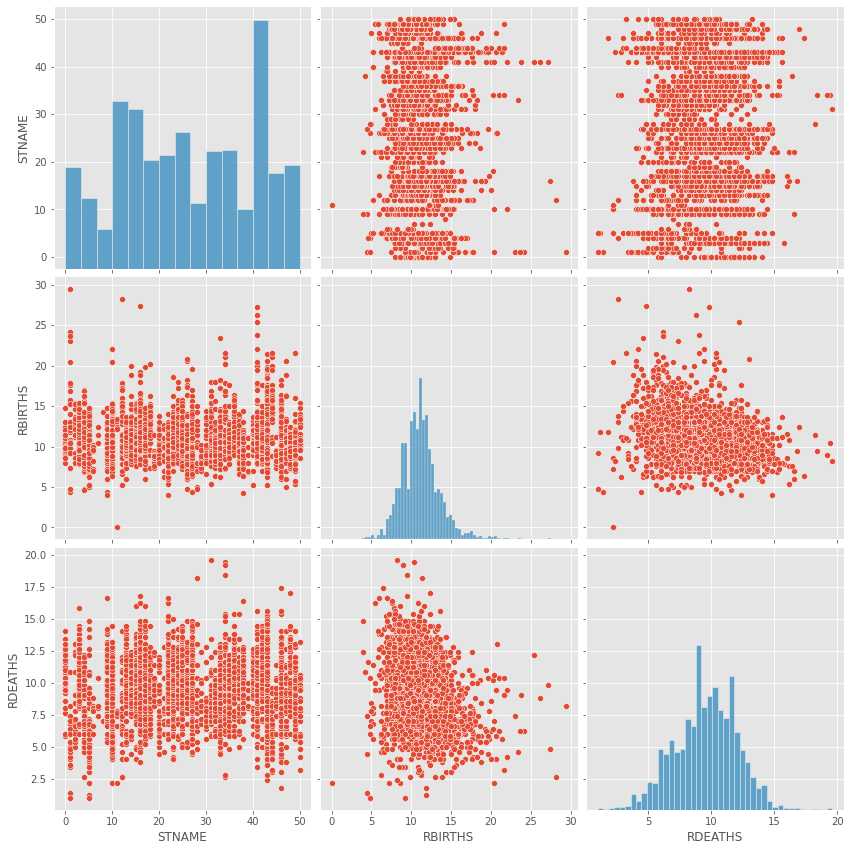

In [ ]:
sb.pairplot(censo_df_Data.dropna(),
            height=4, 
            vars=[
       'STNAME',
       'RBIRTHS', 
       'RDEATHS'],
            kind='scatter')
plt.show()

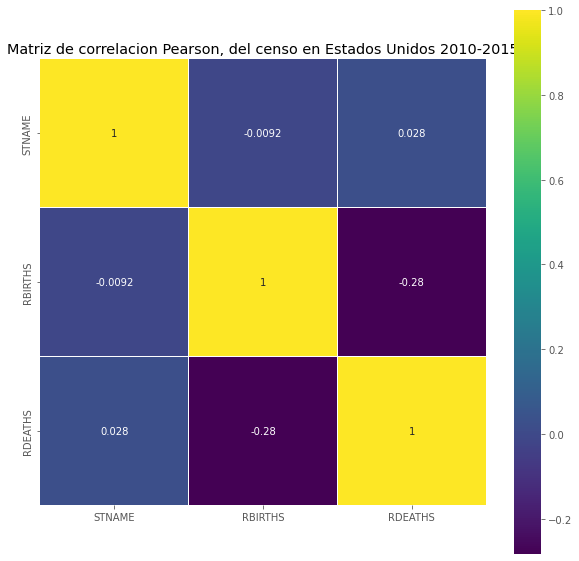

In [ ]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Matriz de correlacion Pearson, del censo en Estados Unidos 2010-2015')
sb.heatmap(censo_df_Data.astype(float).corr(),
           vmax=1.0,
           cmap=colormap,
           annot=True,
           linewidths=0.1,
           linecolor='white',
           square=True)

Al ejecutar el grupo de celdas 'Métodos para establecer el número de clusters' se observa que aunque para el método de códo y el estadistico de gaps aparentemente se consideren suficientes entre 3 o 4 clusters, mediante el método de siluetas se evidencia que uno de los cluster concentra la mayoria de los datos, y los restantes los datos atípicos.

Luego entonces las variables STNAME, RBIRTHS y RDEATHS no arrojan resultados concluyentes, así que no se seleccionan.

# PUNTO 2

## Metodos para establecer el número de clusteres

**Método de la curva de codo**

Valores:  [691131.0346382728, 194614.240203341, 112971.58729553151, 83501.6914078028, 60688.185254098295, 54542.222863438365, 48422.126565958875, 43802.24627054547, 41568.56289915014, 39120.67333523435]


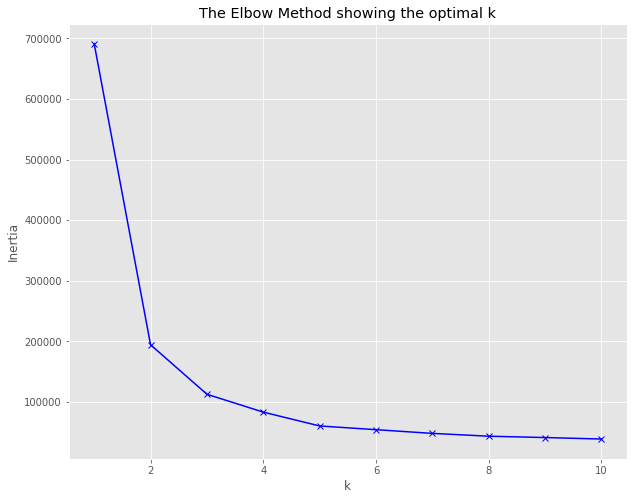

In [ ]:
def elbow_curve(data, maxClusters = 15):

  # rango de valores del parámetro a optimizar (cantidad de clusters)
  maxClusters = range(1, maxClusters + 1)
  inertias = []

  # se ejecuta el modelo para el rango de clusters y se guarda la inercia
  # respectiva obtenida para cada valor
  for k in maxClusters:
    kmeanModel = KMeans(n_clusters = k)
    kmeanModel.fit(censo_df_Data)
    inertias.append(kmeanModel.inertia_)

  # Grafico de los resultados obtenidos para cada valor del rango
  print("Valores: ",inertias)
  plt.figure(figsize=(10, 8))
  plt.plot(maxClusters, inertias, 'bx-')
  plt.xlabel('k')
  plt.ylabel('Inertia')
  plt.title('The Elbow Method showing the optimal k')
  plt.show()

elbow_curve(censo_df_Data, maxClusters = 10)

**Estadistico de Gap**

La cantidad óptima de clusters es:  5


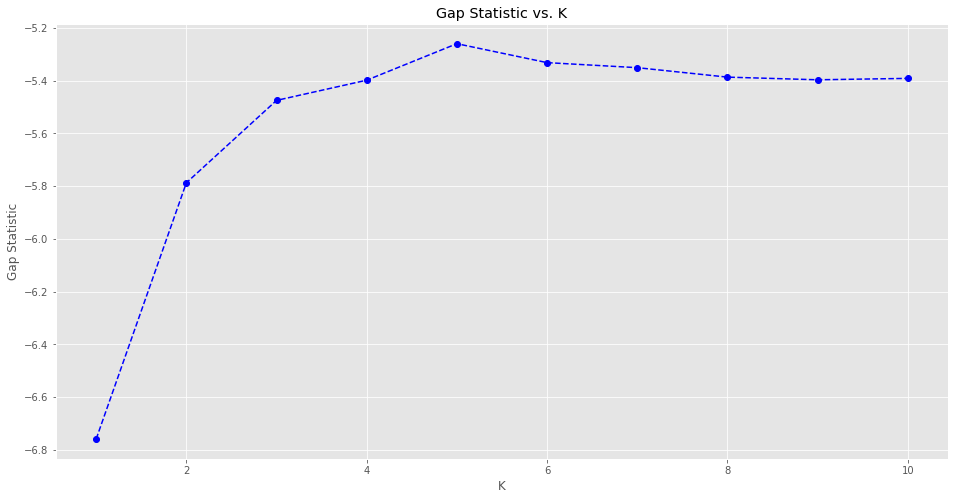

In [ ]:
# nrefs es la cantidad de datos ("datasets") de referencia contra los que se va a comparar
def optimalK(data, nrefs=3, maxClusters=15):

    gaps = np.zeros((len(range(1, maxClusters+1)),))
    resultsdf = pd.DataFrame({'clusterCount':[], 'gap':[]})
    for gap_index, k in enumerate(range(1, maxClusters+1)):

        # guardara los resultados de dispersión de cada distribución simulada
        refDisps = np.zeros(nrefs)

        # Genera las muestras aleatorias indicadas con nrefs y ejecuta k-means
        # en cada bucle obteniendo los resultados de dispersión (inercia)
        # para cada conjunto generado.
        for i in range(nrefs):
            
            # Crea nuevo conjunto aleatorio de referencia
            # Se puede usar una semilla para tener reproducibilidad
            np.random.seed(0)
            randomReference = np.random.random_sample(size=data.shape)
            
            # se ajusta el modelo al conjunto de referencia
            km = KMeans(k)
            km.fit(randomReference)
            # se guarda la dispersión obtenida
            refDisp = km.inertia_
            refDisps[i] = refDisp

        # Se ajusta el modelo a los datos originales y se guarda su inercia
        km = KMeans(k)
        km.fit(data)
        
        origDisp = km.inertia_

        # Calcula el estadístico de gap para k clusters usando el promedio de
        # las dispersiones de los datos simulados y la dispersión de los datos originales.
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)

        # Guarda el estadístico de gap obtenido en este bucle.
        gaps[gap_index] = gap
        
        resultsdf = resultsdf.append({'clusterCount':k, 'gap':gap}, ignore_index=True)

    # Selecciona el "primer máximo" de los estadísticos obtenidos y devuelve 
    # su respectivo número de clusters    
    for i in range(0, len(gaps)-1):
      if gaps[i+1] <= gaps[i]:
        return (i+1, resultsdf)
    return (len(gaps), resultsdf)
    #return (gaps.argmax() + 1, resultsdf)  # Plus 1 because index of 0 means 1 cluster is optimal, index 2 = 3 clusters are optimal

k, gapdf = optimalK(censo_df_Data, nrefs=5, maxClusters=10)
print('La cantidad óptima de clusters es: ', k)

plt.figure(figsize=(16,8))
plt.plot(gapdf['clusterCount'], gapdf['gap'], linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Gap Statistic');
plt.title('Gap Statistic vs. K');

**Coeficiente de silueta**

For n_clusters = 2 The average silhouette_score is : 0.5926496379978856
For n_clusters = 3 The average silhouette_score is : 0.4893686919613446
For n_clusters = 4 The average silhouette_score is : 0.46553439960044923
For n_clusters = 5 The average silhouette_score is : 0.44359925593046207
For n_clusters = 6 The average silhouette_score is : 0.3998876834704154


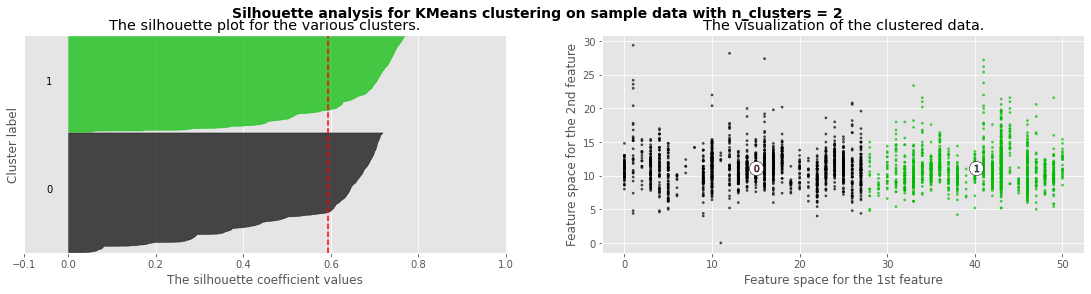

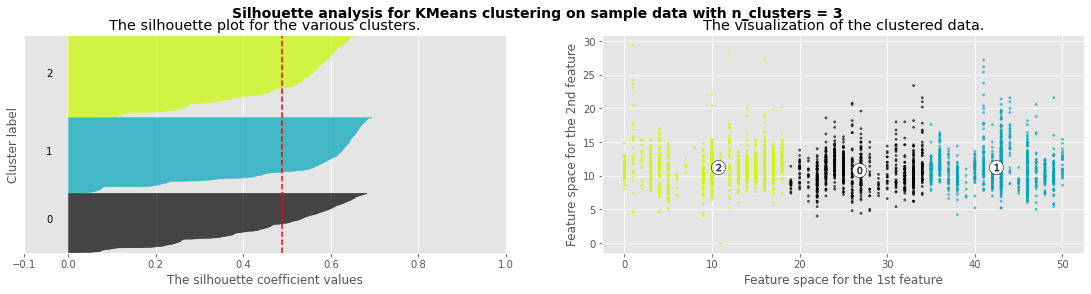

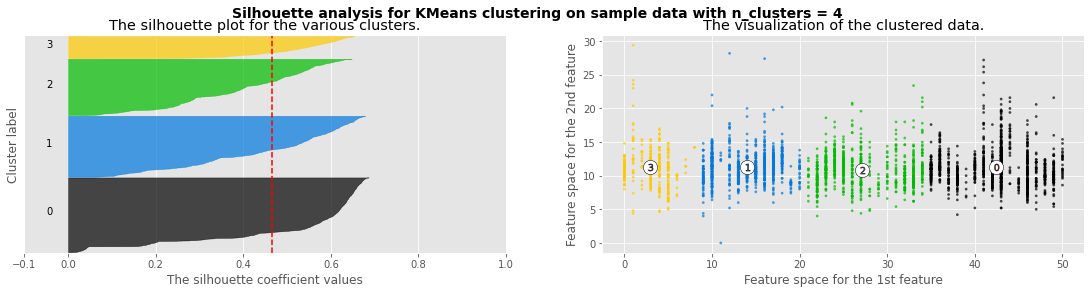

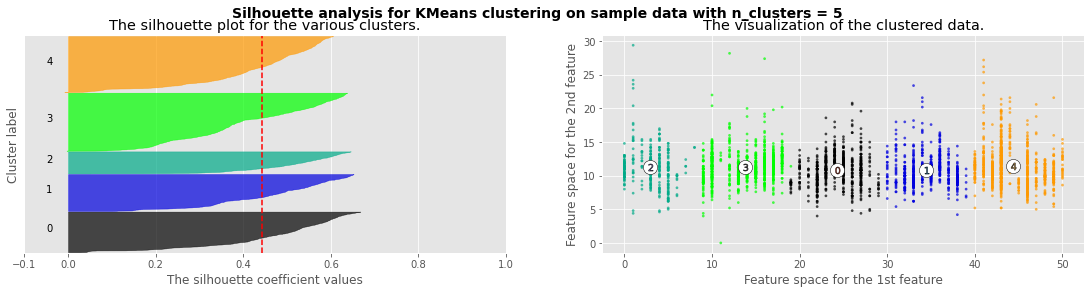

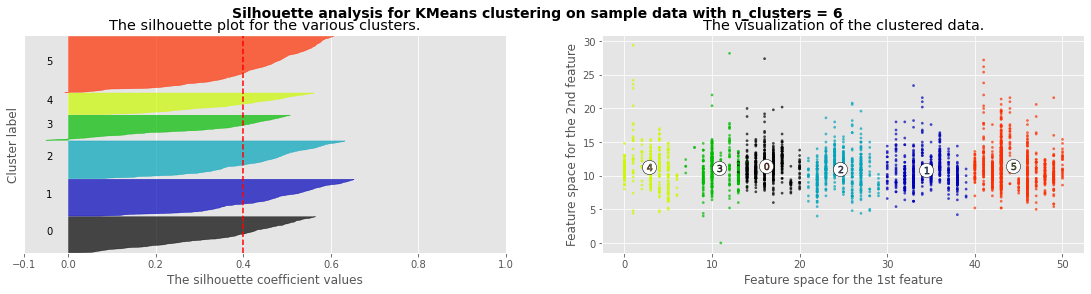

In [ ]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

colors_k_means = ['cyan','purple','orange']
range_n_clusters = [2, 3, 4, 5, 6]
X = np.array(censo_df_Data)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(19, 4)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

## Visualización de datos agrupados

**Visualización de los cluster aplicando el método de Kmeans**

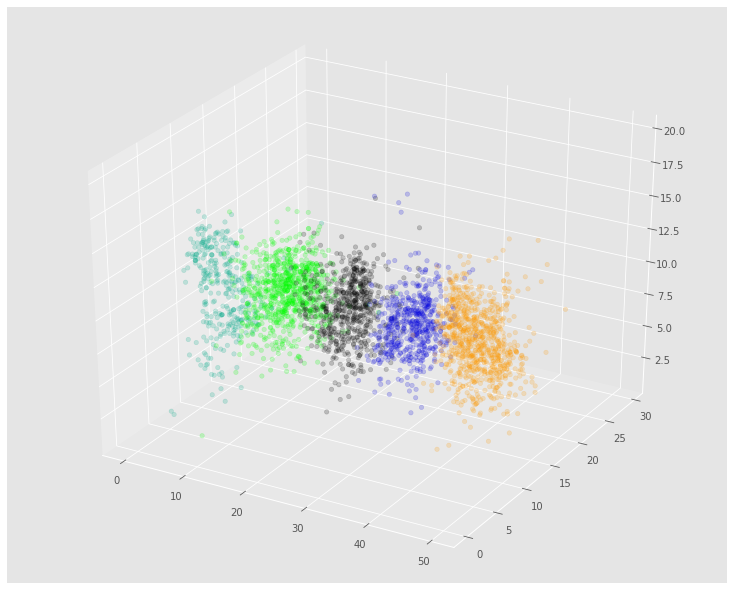

In [ ]:
#Determinar el número de clusters que se quieran visualizar en el data set
n_clusters=5

clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(censo_df_Data)
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
ax.scatter(censo_df_Data[censo_df_Data.columns[0]], censo_df_Data[censo_df_Data.columns[1]], censo_df_Data[censo_df_Data.columns[2]], c=colors, alpha=0.2)
plt.show()

**visualización de los cluster aplicando el metodo del Clustering**

In [ ]:
#Se va a realizar la normalización de los datos con la función MinMax.
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

censo_norma = censo_df_Data.copy()  
censo_norma = minmax_norm(censo_df_Data)  

#Crear el modelo con la metrica euclidiana y vinculación minimizando la distancia.
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

#Aplicar el modelo
data_fit_5 = model.fit(censo_norma)
lab_5c = data_fit_5.labels_

graf_censo_df_Data = censo_df_Data.copy()
graf_censo_df_Data['Clusters'] = lab_5c

fig = px.scatter_3d(graf_censo_df_Data, x=graf_censo_df_Data.columns[0], y=graf_censo_df_Data.columns[1], z=graf_censo_df_Data.columns[2],color="Clusters")
fig.show()

# PUNTO 3

## Dendograma

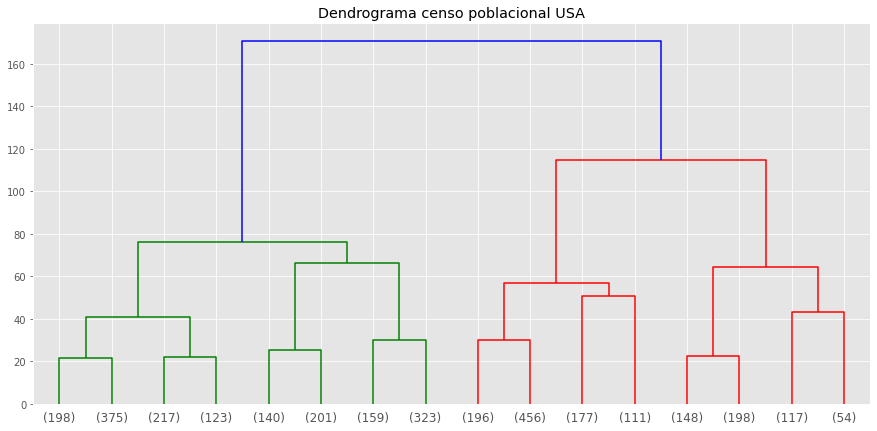

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(15, 7))  
pyplot.title("Dendrograma censo poblacional USA") 
censo_df_Data_WithoutCSucces=censo_df_Data.drop([censo_df_Data.columns[0]],axis=1) 
dend = shc.dendrogram(shc.linkage(censo_df_Data_WithoutCSucces, method='ward'),truncate_mode='level',p=3)

Al observar el dendrograma obtenido de los datos, podemos notar que la partición final va a ocurrir con cuatro conglomerados, los cuales van a estar en un nivel de similitud de aproximadamente 75. También se puede observar que la cantidad de datos para el primer cluster van a ser 913, para el segundo cluster van a haber 823 datos, para el tercer cluster 940 datos y para el cuarto cluster hay 517 datos. 

# PUNTO 4

## Visualización de datos agrupados


**visualización de los cluster aplicando el metodo del Clustering**

In [ ]:
#Determinar número de clusters al quer se quiera visualizar
n_clusters=5

#Se va a realizar la normalización de los datos con la función MinMax.
def minmax_norm(df):
    return (df - df.min()) / ( df.max() - df.min())

censo_norma = censo_df_Data.copy()  
censo_norma = minmax_norm(censo_df_Data)  

#Crear el modelo con la metrica euclidiana y vinculación minimizando la distancia.
model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')

#Aplicar el modelo
data_fit_5 = model.fit(censo_norma)
lab_5c = data_fit_5.labels_

graf_censo_df_Data = censo_df_Data.copy()
graf_censo_df_Data['Clusters'] = lab_5c

fig = px.scatter_3d(graf_censo_df_Data, x=graf_censo_df_Data.columns[0], y=graf_censo_df_Data.columns[1], z=graf_censo_df_Data.columns[2],color="Clusters")
fig.show()

**Visualización de los cluster aplicando el método de Kmeans**

In [ ]:
#Se aplica el modelo KMeans
kmeans_model = KMeans(n_clusters=n_clusters).fit(censo_df_Data)

#Labels del ajuste
censo_labels = kmeans_model.labels_

#Centroides de los clusters
centroids_3D = kmeans_model.cluster_centers_
centroids_3D = pd.DataFrame(centroids_3D)
centroids_3D

,0,1,2
0,13.710829,11.358986,9.735253
1,34.436594,10.830435,9.658696
2,44.358423,11.398327,9.412664
3,24.260297,10.848764,9.803295
4,2.884498,11.269301,8.779939


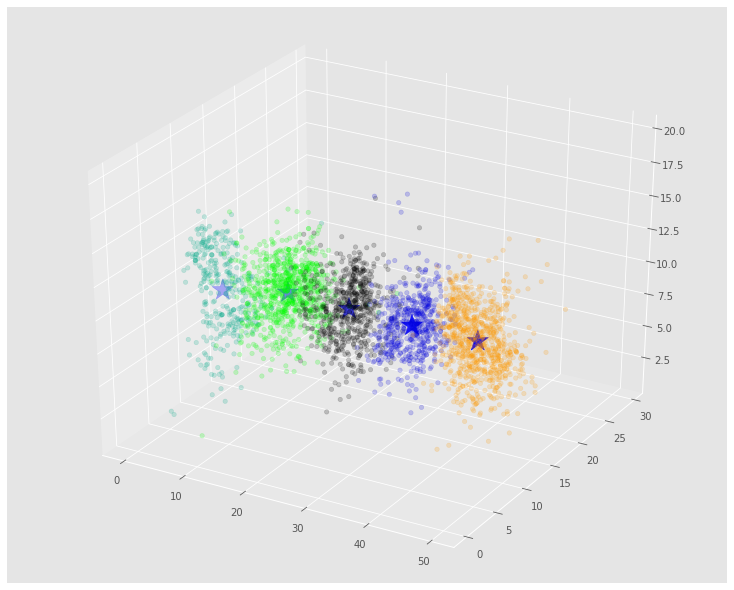

In [ ]:
#Vizualisación de los clusters y sus centroides
clusterer = KMeans(n_clusters=n_clusters, random_state=10)
cluster_labels = clusterer.fit_predict(censo_df_Data)
colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
fig = plt.figure(figsize=(10, 8))
ax = Axes3D(fig)
ax.scatter(censo_df_Data[censo_df_Data.columns[0]], censo_df_Data[censo_df_Data.columns[1]], censo_df_Data[censo_df_Data.columns[2]], c=colors, alpha=0.2)
ax.scatter(centroids_3D[centroids_3D.columns[0]], centroids_3D[centroids_3D.columns[1]], centroids_3D[centroids_3D.columns[2]], marker='*', c='b', s=500)
plt.show()

In [ ]:
graf_censo_df_Data

,STNAME,RBIRTHS,RDEATHS,Clusters
0,0,12.0,10.0,1
1,0,10.6,9.2,1
2,0,11.0,9.2,1
3,0,10.4,10.6,1
4,0,10.6,10.4,1
...,...,...,...,...
3188,50,13.4,5.4,4
3189,50,11.0,3.2,4
3190,50,14.8,5.8,4
3191,50,10.8,9.4,0


Se observa que mediante el metodo KMeans se pueden establecer caracteristicas principales de cada cluster mediante los centroides

In [ ]:
closest, _ = pairwise_distances_argmin_min(centroids_3D, graf_censo_df_Data.drop('Clusters',axis=1))
closest

array([ 765, 2164, 2834, 1435,  177])

In [ ]:
print(tabulate(graf_censo_df_Data.iloc[[2834]], headers = 'keys', tablefmt = 'orgtbl'))

|      |   STNAME |   RBIRTHS |   RDEATHS |   Clusters |
|------+----------+-----------+-----------+------------|
| 2834 |       44 |      10.6 |       9.2 |          0 |


**se puede observar que para el cluster 0 las caracteristicas representativas son estados cercanos al estado 44, con promedio de tasa de nacimiento de 10.6, y un promedio de tasa de muerte de 9.2**

In [ ]:
print(tabulate(graf_censo_df_Data.iloc[[765]], headers = 'keys', tablefmt = 'orgtbl'))

|     |   STNAME |   RBIRTHS |   RDEATHS |   Clusters |
|-----+----------+-----------+-----------+------------|
| 765 |       14 |      11.6 |       9.4 |          1 |


**se puede observar que para el cluster 1 las caracteristicas representativas son estados cercanos al estado 14, con promedio de tasa de nacimiento de 11.6, y un promedio de tasa de muerte de 9.4**

In [ ]:
print(tabulate(graf_censo_df_Data.iloc[[1435]], headers = 'keys', tablefmt = 'orgtbl'))

|      |   STNAME |   RBIRTHS |   RDEATHS |   Clusters |
|------+----------+-----------+-----------+------------|
| 1435 |       24 |      10.8 |      10.2 |          2 |


**se puede observar que para el cluster 2 las caracteristicas representativas son estados cercanos al estado 24, con promedio de tasa de nacimiento de 10.8, y un promedio de tasa de muerte de 10.2**


# PUNTO 5

## CONCLUSIONES


podemos notar que las caracteristicas representativas de los cluster de tasa de muerte y tasa de nacimiento son muy cercanos entre ellos, lo que significa que existe una tendencia de que los estados tengan tasas de nacimiento y muerte muy similares.